In [12]:
import pandas as pd
# Set max columns to display
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt

In [13]:
# Importing CSV files


df_adjust_Limits = pd.read_csv(r"C:\Users\saust\OneDrive\Desktop\GitRepo\Project-OptiC4\1 Preprocess\Continuous Data\contData_all.csv")

df_adjustments = pd.read_csv(r"C:\Users\saust\OneDrive\Desktop\GitRepo\Project-OptiC4\CSV\PVs\adjust_limits.csv")


In [14]:
num_columns = df_adjust_Limits.shape[1]
print("Number of features:", num_columns)

Number of features: 47


In [15]:
# # Convert 'Date' column to datetime in df_adjust_Limits and df_LD using the appropriate format
# df_adjust_Limits['Date'] = pd.to_datetime(df_adjust_Limits['Date'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

# # Check for NaT entries in both dataframes
# nat_count_CD = df_adjust_Limits['Date'].isna().sum()

df_adjust_Limits.describe()

,425_pct_Al,AS74550-1%Al2O3,M_Value,C4_pct_Eth,C4_pct_H2O,Butanol,HydWtr_pct_Ammonia,AYC55580,DI55102,DI55152,DI55580,FC42428,FC55003,FC55009,FC55102,FC55152,FC55552,FC55555,FC55569,FC55576,FFC55553,FFC55555,FYC55553,LC52572,LC55553,LC55555,LC55557,LC55568,LC90366,LC90368,PI55004,PI55020,PI55560,TC55552,TC55553,TC55555,TC55566,TI40050,TI52014,TI55013,TI55014,TI55015,TI55016,TI55017,TI55021,TI55023
count,92529.000000,92529.000000,92529.000000,92529.000000,92529.000000,92529.000000,92529.000000,92529.000000,92529.000000,92529.000000,92529.000000,92529.000000,92529.000000,92529.000000,92529.000000,92529.000000,92529.000000,92529.000000,92529.000000,92529.000000,92529.000000,92529.000000,92529.000000,92529.000000,92529.000000,92529.000000,92529.000000,92529.000000,92529.000000,92529.000000,92529.000000,92529.000000,92529.000000,92529.000000,92529.000000,92529.000000,92529.000000,92529.000000,92529.000000,92529.000000,92529.000000,92529.000000,92529.000000,92529.000000,92529.000000,92529.000000
mean,2.167991,11.164801,3.635259,1.546449,20.763729,176.020541,0.969666,9.322677,0.932589,0.940885,0.989917,31255.750403,4485.367569,636.864465,32391.071524,29712.483500,26372.135215,23615.493164,5108.068189,300.408895,9.065688,1.904153,26362.160549,57.597209,49.410129,45.081297,54.086036,32.142177,46.271401,39.567045,1.720951,-1.115614,0.776741,139.134762,147.407055,148.806406,159.515768,202.594339,140.616347,186.056524,185.405281,180.635467,180.062840,174.155293,209.388249,204.551442
std,160.897997,0.713813,0.635125,3.801418,4.418493,818.717480,0.216378,7.940162,0.071202,0.056784,0.057592,10732.504229,2700.832590,639.874465,19794.759034,18134.177201,16018.472242,9899.286000,2718.521228,292.333079,62.687762,28.396037,15643.940151,16.642106,27.054819,25.741444,29.052609,17.588335,26.712839,21.586566,1.759841,1.250550,1.292727,61.048378,69.852562,64.663191,75.440050,324.779705,98.567330,42.547374,35.390509,39.252522,31.290876,38.920794,46.971850,48.796649
min,-9986.000000,8.710000,0.000000,0.001000,0.057000,0.000000,0.070270,-63.099400,0.000000,0.000000,0.000000,-428.202000,-24.455300,-19.480800,-8745.360000,-7000.000000,-12997.800000,-106.878000,0.000000,-9.608200,0.000000,0.000000,-29.830200,-5.000000,-0.628034,-0.631604,-0.627794,-0.750000,0.000000,0.000000,-9.935260,-9.653360,-4.811260,0.000000,0.000000,0.000000,0.000000,0.000000,-44.760100,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.971750,10.702500,3.514170,0.658219,18.111700,4.251160,0.860948,7.324400,0.891747,0.914672,0.962833,26951.300000,2337.230000,3.099870,13969.200000,16471.100000,8965.540000,22605.300000,5490.370000,0.000000,0.949932,0.710168,15452.900000,60.482500,47.528300,40.974000,63.737300,33.094000,25.173700,21.391000,0.338262,-2.078870,0.000000,140.103000,134.791000,179.290000,172.004000,67.023100,117.096000,180.748000,181.440000,179.017000,180.246000,175.503000,216.748000,214.930000
50%,6.117390,11.383200,3.605200,1.218390,20.331600,8.258330,0.933966,10.435300,0.944310,0.940669,0.992932,35535.500000,5560.530000,553.495000,41868.900000,39065.300000,35489.200000,28118.000000,6435.820000,279.721000,0.989751,0.761597,34970.200000,63.012400,64.404600,51.047200,69.038400,40.870400,48.922300,45.387800,1.509360,-0.803124,0.421815,164.063000,166.623000,180.033000,194.879000,79.730100,128.169000,196.437000,193.827000,191.034000,187.909000,182.940000,220.644000,217.705000
75%,6.271180,11.646700,3.707800,1.662060,22.904800,36.368800,1.032200,12.215000,0.985118,0.972637,1.024100,38801.500000,6313.160000,1125.450000,47119.700000,42776.200000,38315.900000,29759.500000,6734.140000,474.954000,1.020650,0.782080,38162.500000,64.851800,67.563000,64.807800,71.171100,41.443800,67.946700,55.634800,2.731160,0.000000,1.492640,178.448000,188.224000,181.900000,204.747000,89.851300,137.201000,208.774000,203.054000,200.578000,194.352000,190.993000,225.104000,221.650000
max,8.058320,12.907000,30.115400,90.136000,95.818000,36301.200000,10.726700,28.152300,1.212410,1.317230,1.1

In [16]:
# Annotate all range adjustements with rationale

#df_adjustments = pd.read_csv(r"C:\Users\saust\OneDrive - Sasol\1 Project rC4\Data\CSV to PRocess\RangeD.csv")
df_adjustments

,Range,425 %Al,Butanol,Decanol,FC42428,FC52018,FC55003,FC55009,FC55102,FC55152,FC55552,FC55555,FC55569,FC55576,FFC55553,FFC55555,FI55580,FYC55553,LC52572,LC55553,LC55555,LC55557,LC55568,LC90366,LC90368,PI55004,PI55020,PI55560,TC52015,TC55552,TC55553,TC55555,TC55566,TI40050,TI55013,TI55014,TI55015,TI55016,TI55017,TI55021,TI55023,TI55565,TI90366,TI90368
0,Min,0,0,0,0,5000,0,0,0,0,5000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,-10.0,-10.0,-4.7,0,100,100,100,0,0,0,0,0,0,0,0,0,150,0
1,Max,10,100,10,50000,50000,40000,3000,70000,70000,52000,70000,12800,1500,10,1,70000,60000,100,100,100,100,100,100,100,20.3,20.3,10.3,250.0,300,275,300,300,125,300,300,300,300,300,350,350,300,200,200


In [17]:
#Finds and removes system limit (Min/Max) values

# Assuming df_adjustments and df_adjust_Limits are your dataframes

# Extract the min and max rows from df_adjustments into separate Series
min_values = df_adjustments[df_adjustments['Range'] == 'Min'].iloc[0, 1:]
max_values = df_adjustments[df_adjustments['Range'] == 'Max'].iloc[0, 1:]

# Iterate through each column in df_adjust_Limits
for col in df_adjust_Limits.columns:
    # Check if the column exists in df_adjustments
    if col in min_values.index:
        # Get the min and max values for this column from df_adjustments
        min_val = min_values[col]
        max_val = max_values[col]
        
        # Filter out values in df_adjust_Limits that are less than min or greater than max
        df_adjust_Limits.loc[df_adjust_Limits[col] < min_val, col] = None
        df_adjust_Limits.loc[df_adjust_Limits[col] > max_val, col] = None


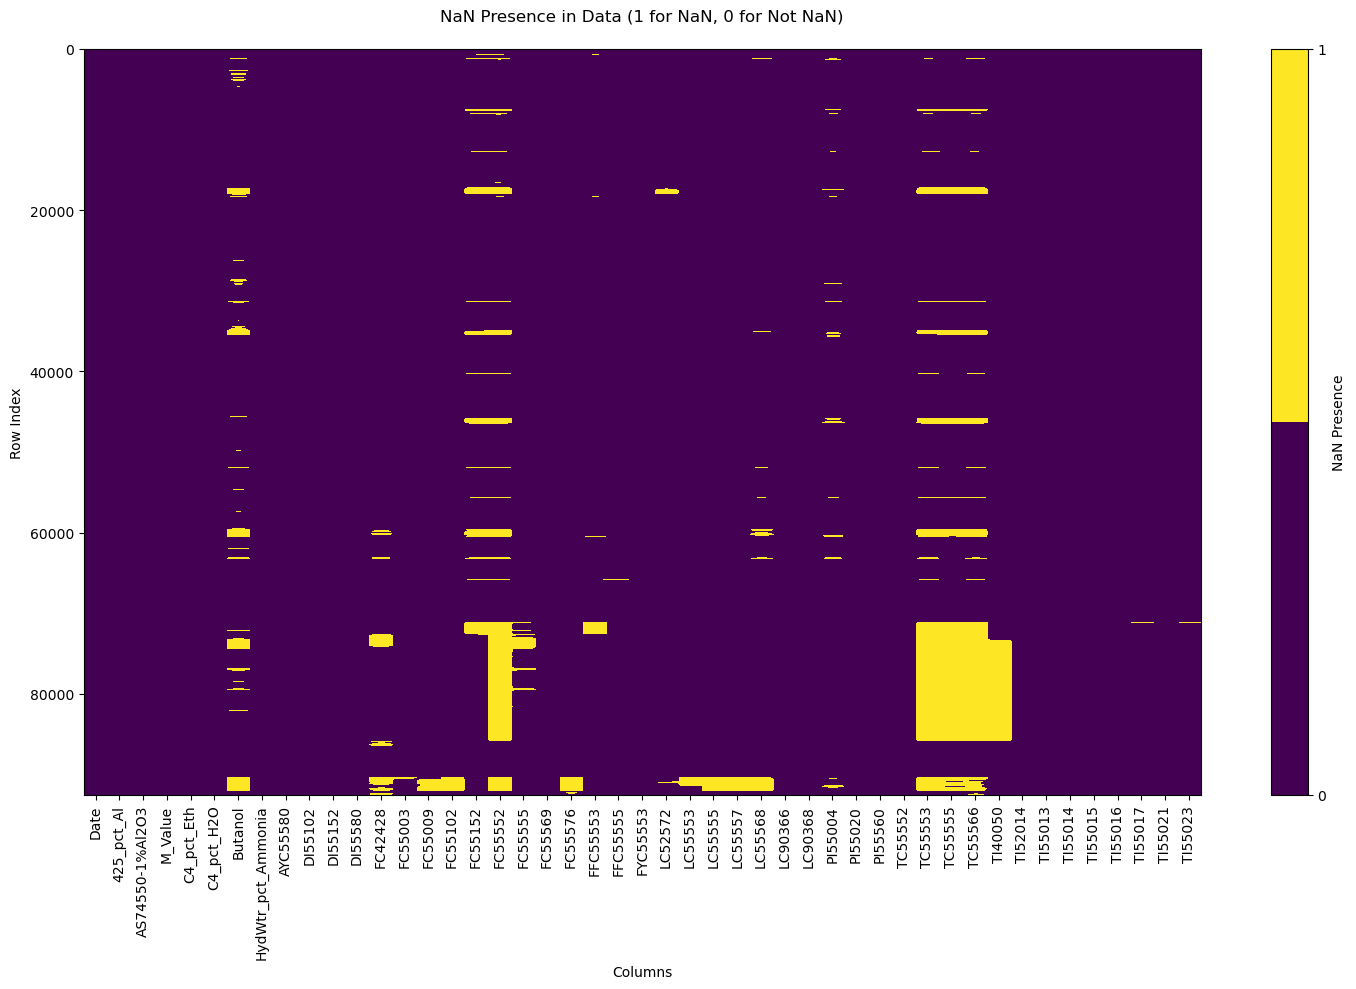

In [18]:
# Create a binary matrix to represent NaNs (1 for NaN, 0 for a number)
nan_matrix = np.where(df_adjust_Limits.isna(), 1, 0)

fig, ax = plt.subplots(figsize=(15, 10))  # Adjust the size as needed
cmap = plt.get_cmap('viridis', 2)  # We use a colormap that differentiates between 0 and 1 clearly

# Plotting heatmap
cax = ax.imshow(nan_matrix, cmap=cmap, aspect='auto')

# Adding colorbar for reference
plt.colorbar(cax, ticks=[0, 1], label='NaN Presence')
plt.title("NaN Presence in Data (1 for NaN, 0 for Not NaN)", pad=20)

# To make the columns readable and vertical
plt.xticks(range(df_adjust_Limits.shape[1]), df_adjust_Limits.columns, rotation=90)  # rotation set to 90 for vertical labels

plt.xlabel('Columns')
plt.ylabel('Row Index')

plt.tight_layout()
plt.show()

In [19]:
# Calculate the statistics for each column in df_adjust_Limits
total_rows = len(df_adjust_Limits)
non_nan_count = df_adjust_Limits.count()
nan_count = df_adjust_Limits.isnull().sum()
nan_percentage = (nan_count / total_rows) * 100

# Store these in a DataFrame
nan_stats = pd.DataFrame({
    'ID': df_adjust_Limits.columns,
    'total_rows': total_rows,
    'non_nan_count': non_nan_count.values,
    'nan_count': nan_count.values,
    'nan_percentage': nan_percentage.values
})

print(nan_stats)

                    ID  total_rows  non_nan_count  nan_count  nan_percentage
0                 Date       92529          92529          0        0.000000
1           425_pct_Al       92529          92529          0        0.000000
2      AS74550-1%Al2O3       92529          92529          0        0.000000
3              M_Value       92529          92529          0        0.000000
4           C4_pct_Eth       92529          92529          0        0.000000
5           C4_pct_H2O       92529          92529          0        0.000000
6              Butanol       92529          77300      15229       16.458624
7   HydWtr_pct_Ammonia       92529          92529          0        0.000000
8             AYC55580       92529          92529          0        0.000000
9              DI55102       92529          92529          0        0.000000
10             DI55152       92529          92529          0        0.000000
11             DI55580       92529          92529          0        0.000000

In [20]:
#Analysis of remaining NaNs suggests minimal impact - REMOVE

df_adjust_Limits = df_adjust_Limits.dropna()

# Calculate the statistics for each column in df_pivot
total_rows = len(df_adjust_Limits)
non_nan_count = df_adjust_Limits.count()
nan_count = df_adjust_Limits.isnull().sum()
nan_percentage = (nan_count / total_rows) * 100

# Store these in a DataFrame
nan_stats = pd.DataFrame({
    'ID': df_adjust_Limits.columns,
    'total_rows': total_rows,
    'non_nan_count': non_nan_count.values,
    'nan_count': nan_count.values,
    'nan_percentage': nan_percentage.values
})

print(nan_stats)

                    ID  total_rows  non_nan_count  nan_count  nan_percentage
0                 Date       61183          61183          0             0.0
1           425_pct_Al       61183          61183          0             0.0
2      AS74550-1%Al2O3       61183          61183          0             0.0
3              M_Value       61183          61183          0             0.0
4           C4_pct_Eth       61183          61183          0             0.0
5           C4_pct_H2O       61183          61183          0             0.0
6              Butanol       61183          61183          0             0.0
7   HydWtr_pct_Ammonia       61183          61183          0             0.0
8             AYC55580       61183          61183          0             0.0
9              DI55102       61183          61183          0             0.0
10             DI55152       61183          61183          0             0.0
11             DI55580       61183          61183          0             0.0

In [21]:
# 73745

df_adjust_Limits = df_adjust_Limits.sort_values('Date')
df_adjust_Limits = df_adjust_Limits.reset_index(drop=True)


# Save DataFrame to CSV file in the same directory as the Jupyter Notebook
df_adjust_Limits.to_csv('adjusted_Limits.csv', index=False)

In [22]:
df_adjust_Limits.describe()



,425_pct_Al,AS74550-1%Al2O3,M_Value,C4_pct_Eth,C4_pct_H2O,Butanol,HydWtr_pct_Ammonia,AYC55580,DI55102,DI55152,DI55580,FC42428,FC55003,FC55009,FC55102,FC55152,FC55552,FC55555,FC55569,FC55576,FFC55553,FFC55555,FYC55553,LC52572,LC55553,LC55555,LC55557,LC55568,LC90366,LC90368,PI55004,PI55020,PI55560,TC55552,TC55553,TC55555,TC55566,TI40050,TI52014,TI55013,TI55014,TI55015,TI55016,TI55017,TI55021,TI55023
count,61183.000000,61183.000000,61183.000000,61183.000000,61183.000000,61183.000000,61183.000000,61183.000000,61183.000000,61183.000000,61183.000000,61183.000000,6.118300e+04,61183.000000,61183.000000,61183.000000,61183.000000,61183.000000,61183.000000,61183.000000,61183.000000,61183.000000,61183.000000,61183.000000,61183.000000,61183.000000,61183.000000,61183.000000,61183.000000,61183.000000,61183.000000,61183.000000,61183.000000,61183.000000,61183.000000,61183.000000,61183.000000,61183.000000,61183.000000,61183.000000,61183.000000,61183.000000,61183.000000,61183.000000,61183.000000,61183.000000
mean,4.181785,11.256610,3.638531,1.424224,21.263071,11.909159,0.987792,11.234233,0.934582,0.936752,0.996300,35271.005021,5.955163e+03,841.460138,43201.718635,39360.333710,35357.861852,27318.648722,6613.638800,388.143849,0.993617,0.772448,35073.790768,63.032312,63.420719,57.423419,69.504202,40.816081,46.185732,37.562082,2.314495,-1.438885,1.082990,167.812854,180.650558,181.067704,197.353394,73.529761,129.360369,200.303238,196.605726,194.081062,189.843798,185.415406,223.940370,218.658017
std,114.151461,0.688572,0.764223,2.813745,4.496223,15.702383,0.209937,4.766189,0.062562,0.037368,0.051728,6053.880980,1.049559e+03,611.225779,7693.560612,6845.036506,5603.405004,4437.632300,489.791398,266.367930,0.059414,0.026174,5661.117372,3.214762,7.169834,10.023293,3.052131,2.874943,28.317596,20.470572,1.338742,1.143365,1.128761,16.091011,28.796208,1.838785,13.597817,15.444399,14.229348,18.074804,14.075178,14.032015,9.388143,10.127155,11.289051,4.168046
min,-9730.860000,8.710000,0.571967,0.001000,0.057000,0.000000,0.070270,-6.118310,0.000000,0.000000,0.000000,57.069400,1.930000e-17,0.000000,0.000000,83.693800,7377.560000,0.000000,0.000000,0.000000,0.042564,0.000000,1102.580000,0.000000,0.000000,0.000000,0.000000,1.270380,0.000000,0.006367,0.000000,-5.655290,-4.807810,109.571000,102.756000,100.587000,100.969000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.993350,10.885550,3.505885,0.650000,18.657550,3.758610,0.876353,9.700835,0.897377,0.913201,0.964731,32987.850000,5.375725e+03,330.696000,39905.450000,37313.800000,33967.450000,25971.950000,6334.645000,212.437500,0.970770,0.758463,33467.050000,61.654150,59.844050,49.212700,67.283100,40.482950,22.170000,20.677600,1.282275,-2.321870,0.222328,154.839000,159.675000,179.967000,185.552000,62.899300,121.068500,185.216000,185.027000,182.732500,182.286000,177.858000,217.675000,215.578000
50%,6.137750,11.448800,3.595600,1.218030,21.230800,5.966670,0.944268,10.767100,0.942976,0.935138,0.996977,37590.800000,5.959760e+03,811.863000,45196.900000,41084.400000,37837.600000,28900.200000,6570.800000,352.950000,0.997100,0.774531,37192.700000,63.428000,65.512000,60.011000,70.052700,41.180600,48.380800,42.983100,2.006360,-1.430780,0.800237,171.875000,175.590000,180.144000,200.060000,76.819000,129.844000,198.625000,195.379000,193.046000,188.773000,184.491000,220.753000,217.907000
75%,6.302495,11.697100,3.697370,1.727955,23.205850,12.074650,1.046060,13.401700,0.981573,0.956187,1.032315,39322.800000,6.545850e+03,1314.430000,48227.600000,43544.750000,38989.200000,30054.700000,6825.885000,570.241000,1.019440,0.789336,38731.800000,64.963500,68.245550,65.129900,71.824700,41.573000,74.007000,53.146000,3.126355,-0.424440,1.794545,180.434000,198.325500,182.107000,205.214000,85.156100,138.070000,211.006500,204.531000,202.122000,195.221500,191.594000,224.809500,221.367000
max,8.058320,12.907000,30.115400,77.165000,95.818000,99.950000,3.744840,28.152300,1.086030,1.065410,1.165180,49959.600000,1.47059

In [ ]:
# 61183 - Alc samples and Niro removed